<a href="https://colab.research.google.com/github/Jorgerestrepo1982/Hello-world/blob/main/PIA05_Guia_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa los módulos necesarios de la librería Keras. Sugerencia:


```
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
```



In [139]:
# Importamos modulos de las librerias Keras
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense


2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. Sugerencia:


```
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```



In [140]:
# Importamos el dataset de imagenes de keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()



3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

*Sugerencia para normalizar:*


```
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
```
*Sugerencia de aplicación one-hot encoding para categorizar etiquetas:*


```
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
```




In [141]:
# Exploramos datos y dimensionamos imagenes
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [142]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [143]:
y_train.shape

(50000, 1)

In [144]:
len(y_test)

10000

He intentado hacer el One hot output con feature engine, pero no se me instala correctamente en el portatil.

In [145]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.preprocessing import OneHotEncoder
ohe_enc=OneHotCategoricalEncoder(top_categories=None,
                                 variables=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship',
               'truck'],
                                 drop_last=True)
ohe_enc.fit(y_train)

ModuleNotFoundError: No module named 'feature_engine.categorical_encoders'

Categorizamos con One hot usando tensorflow, ya que con esta opción no me falla.

In [146]:
from tensorflow.keras.utils import to_categorical

# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

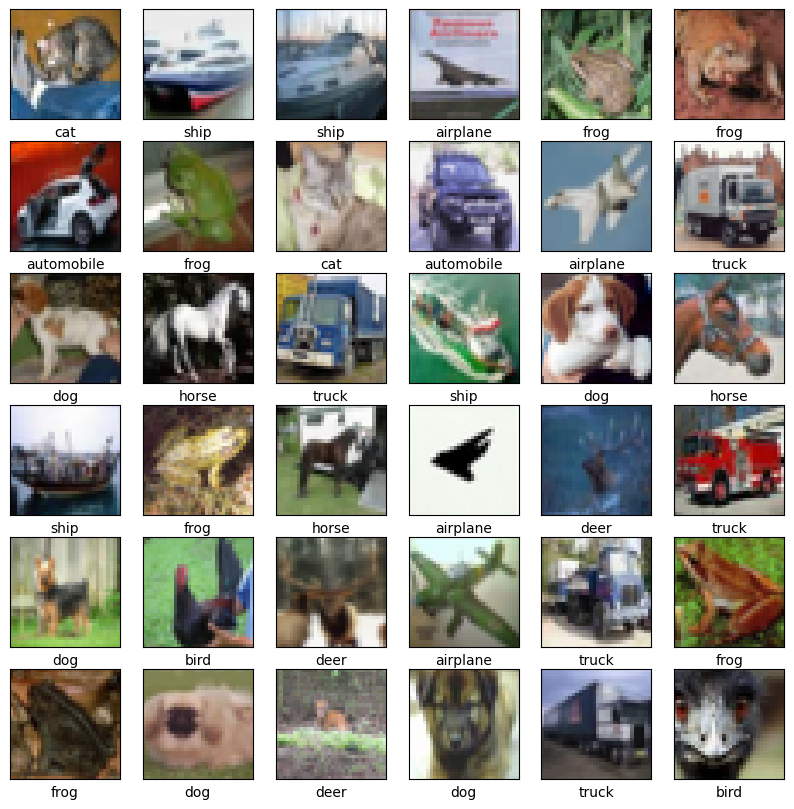

In [147]:
import matplotlib.pyplot as plt

#mostramos  imagenes con su respectivo label

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap = plt.cm.binary)
  # Use argmax to get the index of the predicted class
  plt.xlabel(class_names[y_test[i].argmax()])


4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible.

In [148]:

# Creamos el modelo de red neuronal Dense
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))




5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

In [149]:
# Usamos la función compile, con la función loss = 'categorical_crossentropy' y
# el optimizador Adam. Utiliza la función fit para entrenar el modelo,
# inicialmente, con 20 epochs.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# usamos funcion fit con 10 epochs
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2759 - loss: 2.0180 - val_accuracy: 0.3502 - val_loss: 1.8101
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.3703 - loss: 1.7692 - val_accuracy: 0.3834 - val_loss: 1.7059
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3849 - loss: 1.7185 - val_accuracy: 0.3888 - val_loss: 1.7012
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3998 - loss: 1.6836 - val_accuracy: 0.4035 - val_loss: 1.6800
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4085 - loss: 1.6565 - val_accuracy: 0.4088 - val_loss: 1.6614
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4099 - loss: 1.6522 - val_accuracy: 0.4004 - val_loss: 1.6963
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4190 - loss: 1.6392 - val_accuracy: 0.3971 - val_loss: 1.6783
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4177 - loss: 1.

6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [ ]:
# Aumento de neuronas y capas
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu')) # Incremento de neuronas
model.add(Dense(256, activation='relu')) # Añadimos una capa mas

# Compilamos
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo con mas epochs
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test)) # Epochs incrementados



7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [ ]:
# Escribe aquí tu código


8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. Aquí tienes una posible forma de hacerlo (recuerda poner el nombre de tu modelo a la hora de aplicar el método predict):


```
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
```



In [ ]:
# Escribe aquí tu código
